## Introduction

This notebook calculates the speed (magnitude of velocity) distribution, in cases including the Solar motion, and the Earth's yearly motion.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=18)
plt.rcParams['figure.figsize'] = (10.0, 7.0)
 #plt.rc('text', usetex=True)

## Plots

### Speed distribution

In [2]:
def f1(v, v_0, v_e = None):
    # Velocity distribution neglecting 
    if v_e is None:
        # In case of neglecting the earth velocity, we get an easier equation
        return 4 * v**2 / (v_0**3 * np.sqrt(np.pi)) * np.exp(-v**2/ (v_0**2))
    
    # Equation 8.15 from Jungmann supersymmetric dark matter
    return v / (v_e * v_0 * np.sqrt(np.pi) ) * (
        np.exp(- (v-v_e)**2/(v_0**2)) - 
        np.exp(- (v+v_e)**2/(v_0**2)))
        

In [3]:
def f2(v, phase, v_0 = 220., v_e_0 = 232):
    _v_e =  v_e(v_e_0, phase)
    return f1(v, v_0, v_e = _v_e)

In [4]:
def v_e(v_e_0, phase):
    # This is equation 8.14, based on https://journals.aps.org/prd/abstract/10.1103/PhysRevD.37.3388
    # The 1.05 in eqn 8.14 comes from the earth velocity ve = 232 is 1.05 times 220
    # 6.6 percent (about 15 km/s)
    # Phase wrt June 2, opposite is Dec. 1 (http://www.eventcalc.com/hbd.html, very scientific)
    return (1 + 0.07/1.05 * np.cos(phase)) * v_e_0

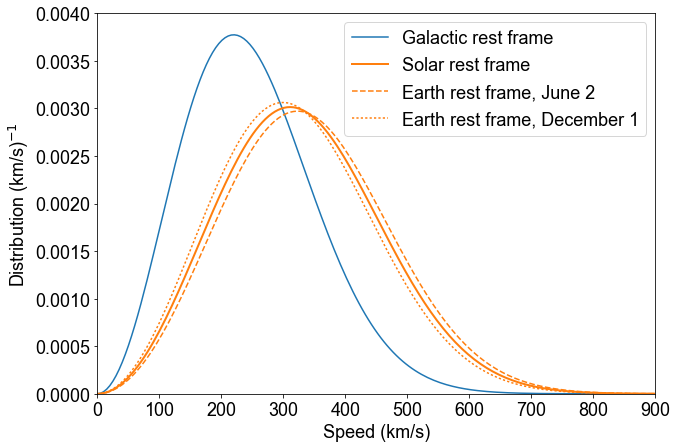

In [5]:
v = np.linspace(0, 1000, 200)

plt.plot(v, f1(v, 220), label = 'Galactic rest frame')
plt.plot(v, f1(v, 220, 232), label = 'Solar rest frame', color='C1', lw=2)
plt.plot(v, f2(v, 0), label = 'Earth rest frame, June 2', ls='--', color='C1')
plt.plot(v, f2(v, np.pi), label = 'Earth rest frame, December 1', ls='dotted', color='C1')
# plt.plot(v, f2(v, np.pi / 2), label = 'Earth on xxxx')

plt.legend()
plt.xlim(0, 900)
plt.ylim(0, 0.004)
plt.xlabel('Speed (km/s)')
plt.ylabel('Distribution (km/s)$^{-1}$')
plt.savefig('plots/speed.pdf', bbox_inches='tight')

## Numbers

### What is the temperature?

In [8]:
v0 = 220e3 # m/s
kb = 1.38065e-23 # .m^2 kg s-2 K-1
m = 100e9 * 1.6022e-19 / (299792458**2) # kg
# Taking 100 GeV

T = m * v0**2 /(2 * kb)


In [10]:
T

312469109.9075103

### How much of the distribution is above the escape velocity?

In [11]:
from scipy import integrate

In [12]:
# Check normalization

In [14]:
integrate.quad(lambda x: f1(x, 220), 0, np.inf)

(0.9999999999999999, 1.1734603837783858e-08)

Check the bit above 544 km/s 

In [15]:
integrate.quad(lambda x: f1(x, 220), 544, np.inf)[0]

0.006639228616161018